# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
NumberOfMarketingCampaigns = 17

print(f'The dataset represents {NumberOfMarketingCampaigns} distinct marketing campaigns.')

The dataset represents 17 distinct marketing campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:


print("Data Types:")
print(df.dtypes)
print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  print(f"- {col}: {df[col].unique()}")

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Categorical Features:
- job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
- marital: ['married' 'single' 'divorced' 'unknown']
- education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
- default: ['no' 'unknown' 'yes']
- housing: ['no' 'yes' 'unknown']

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

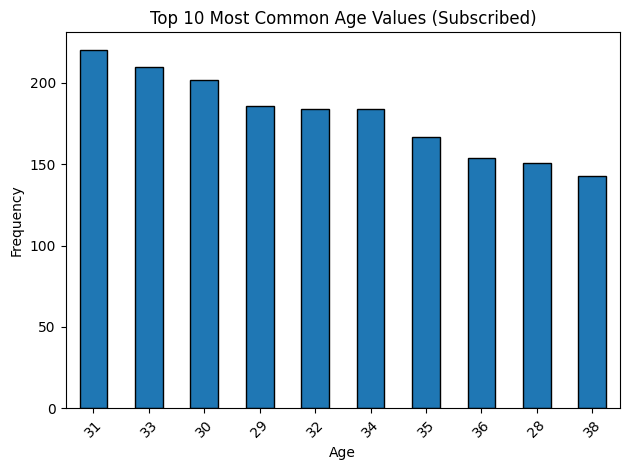

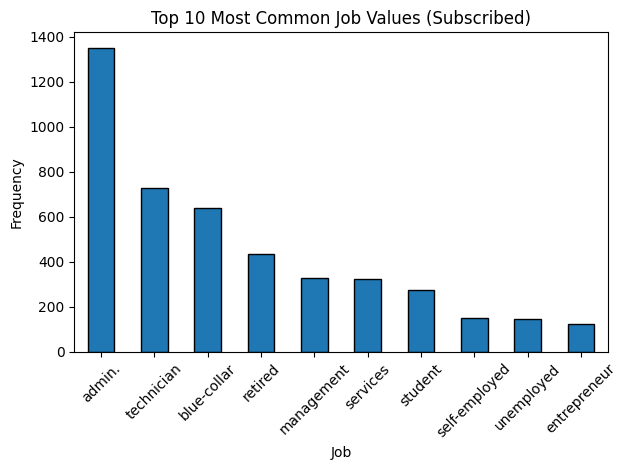

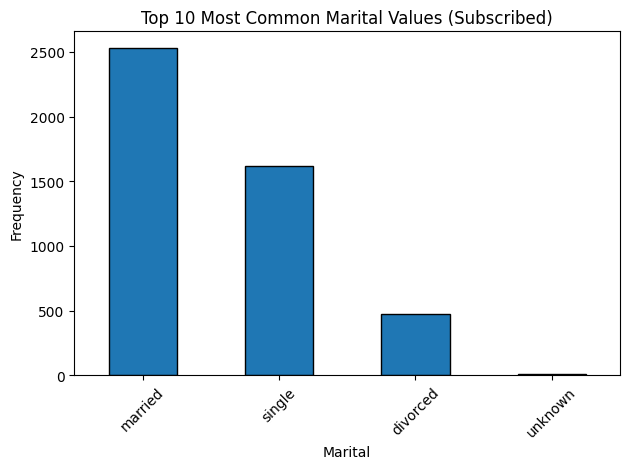

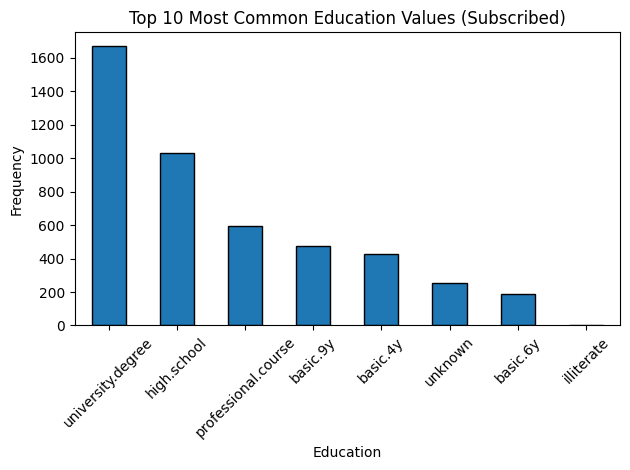

In [20]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and is already loaded
bank_info_features = ['age', 'job', 'marital', 'education']

# Filter for rows where target == 'yes'
filtered_df = df[df['y'] == 'yes']

# Loop through features and plot
for feature in bank_info_features:
    top_values = filtered_df[feature].value_counts().head(10)
    top_values.plot(kind='bar', edgecolor='black', rot=45)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Common {feature.capitalize()} Values (Subscribed)')
    plt.tight_layout()
    plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# features to use
bank_info_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = 'y'

# Separate features and target
X = df[bank_info_features]
y = df[target]

# Identify categorical and numerical features within the selected bank info features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include='number').columns

# Preprocessing: One-Hot Encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# fit
X_processed = preprocessor.fit_transform(X)

# Encode the target variable 'y' (binary: 'yes'/'no')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.25, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(X_train, y_train)
print(f"Most Frequent Accuracy: {dummy_mf.score(X_test, y_test):.2f}")

Most Frequent Accuracy: 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)



### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9144
           1       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time
import pandas as pd


# Scale features for models sensitive to feature magnitudes
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize models with appropriate parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'SVM': LinearSVC(dual='auto', max_iter=5000, random_state=42)
}

results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Train Time (s)': f"{train_time:.4f}",
        'Train Accuracy': f"{accuracy_score(y_train, train_pred):.3f}",
        'Test Accuracy': f"{accuracy_score(y_test, test_pred):.3f}"
    })

results_df = pd.DataFrame(results)

results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.3195,0.887,0.888
1,KNN,0.0123,0.891,0.880
2,Decision Tree,0.1513,0.892,0.887
3,SVM,0.0602,0.887,0.888


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [18]:


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
print("Performing Grid Search for Decision Tree...")
start_time = time.time()
grid_search_dt.fit(X_train, y_train)
grid_search_time = time.time() - start_time
print(f"Grid Search for Decision Tree took: {grid_search_time:.4f}s")

# Get the best parameters and best score
best_dt_params = grid_search_dt.best_params_
best_dt_score = grid_search_dt.best_score_

print("\nBest parameters for Decision Tree:")
print(best_dt_params)
print(f"Best cross-validation accuracy on training set: {best_dt_score:.4f}")

# Evaluate the best model on the test set
best_dt_model = grid_search_dt.best_estimator_
test_accuracy_tuned_dt = best_dt_model.score(X_test, y_test)
print(f"Test Accuracy with best Decision Tree model: {test_accuracy_tuned_dt:.4f}")


# KNN:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("\nBest parameters for KNN:")
print(grid_search_knn.best_params_)
print(f"Best cross-validation accuracy on training set: {grid_search_knn.best_score_:.4f}")
print(f"Test Accuracy with best KNN model: {grid_search_knn.score(X_test, y_test):.4f}")


# Recall`scoring` parameter.
grid_search_dt_recall = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='recall')
grid_search_dt_recall.fit(X_train, y_train)
print("\nGrid Search optimized for Recall for Decision Tree:")
print("Best parameters:", grid_search_dt_recall.best_params_)
print(f"Best cross-validation recall on training set: {grid_search_dt_recall.best_score_:.4f}")
print(f"Test Recall with best Decision Tree model (optimized for recall): {grid_search_dt_recall.score(X_test, y_test):.4f}")

# To evaluate models using multiple metrics after fitting:
y_pred_tuned_dt = best_dt_model.predict(X_test)
report_tuned_dt = classification_report(y_test, y_pred_tuned_dt, target_names=label_encoder.classes_)

print("\nClassification Report for Tuned Decision Tree:")
report_tuned_dt


Performing Grid Search for Decision Tree...
Grid Search for Decision Tree took: 106.2794s

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy on training set: 0.8868
Test Accuracy with best Decision Tree model: 0.8882

Best parameters for KNN:
{'n_neighbors': 9}
Best cross-validation accuracy on training set: 0.8843
Test Accuracy with best KNN model: 0.8852

Grid Search optimized for Recall for Decision Tree:
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation recall on training set: 0.1006
Test Recall with best Decision Tree model (optimized for recall): 0.0943

Classification Report for Tuned Decision Tree:


'              precision    recall  f1-score   support\n\n          no       0.89      1.00      0.94     10968\n         yes       0.55      0.03      0.05      1389\n\n    accuracy                           0.89     12357\n   macro avg       0.72      0.51      0.50     12357\nweighted avg       0.85      0.89      0.84     12357\n'

##### Questions